½# SF task: Known unknowns

In this exercise we would like you to:

- build SOTA solution for image classification,
- find a way to find out if your model works really bad


### SOTA CNN Solution for image classification.

In this task you need to build a CNN model which:

- will be trained on a [`cifar 10`](https://www.cs.toronto.edu/~kriz/cifar.html), 
- will have a stem like in `ResNet 50`, 
- will have at least one skip connection,

A properly solved task should consist of:
- a code cell with a `stem` definition with appropriate citation and image added,
- a code cell with a skip-connection definition with appropriate image added,
- training a model on `CIFAR 10` which achieves at least 70% of accuracy on a test set from `CIFAR 10`.


### Diving into knowing about what do we don't know

The second task is to assess the certainty of your classifier. Your task is to propose a certainty metric which based on your model - will make prediction if a given prediction can be trusted or not.

A properly solved task should consist of:
- a code cell with definition of your metric and a text cell with its explaination,
- a code cell with a histogram of this metric for both properly classified and misclassified examples from CIFAR 10 dataset (histogram should compare distribution of your metric on properly and wrongly classified data).


### Code wrap up: 

Please wrap up your model in the following class as it will be tested against additional dataset:


In [ ]:
import os
import pandas as pd
from keras.constraints import maxnorm
from keras.utils import np_utils
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras
import pickle
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
from keras.datasets import cifar10
    
class Model:
    def make_model(num_classes=10, *args, **kwargs):
        # Create the model

        #stem
        inputs = keras.Input(shape=(32, 32, 3))
        x = keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same')(inputs)
        x = keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same')(x)
        x = keras.layers.Conv2D(64, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same')(x)
        x = keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
        #stem

        #skip connection
        skip = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        #skip connection

        x = keras.layers.Dropout(0.2)(skip)
        x = keras.layers.Conv2D(64, (3, 3), padding='same')(x)

        #skip connection
        merge = keras.layers.add([x, skip])
        #skip connection

        x = keras.layers.Activation('relu')(merge)
        x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
        x = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
        x = keras.layers.Dropout(0.2)(x)
        x = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
        x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
        x = keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
        x = keras.layers.Dropout(0.2)(x)
        x = keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
        x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
        x = keras.layers.Flatten()(x)
        x = keras.layers.Dropout(0.2)(x)
        x = keras.layers.Dense(1024, activation='relu', kernel_constraint=maxnorm(3))(x)
        x = keras.layers.Dropout(0.2)(x)
        x = keras.layers.Dense(512, activation='relu', kernel_constraint=maxnorm(3))(x)
        x = keras.layers.Dropout(0.2)(x)
        x = keras.layers.Dense(num_classes, activation='softmax')(x)

        model = keras.Model(inputs=inputs, outputs=x, name="friends")
        print(model.summary())
        # Compile model
        lrate = 0.01
        decay = lrate / 100
        model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=decay, nesterov=False),
                      metrics=['accuracy'])
        return model

    def predict(self, input_array: np.ndarray) -> np.ndarray:
        predictions = []
        for row in input_array:
            input = np.array(row).reshape((1, 32, 32, 3)).astype('float32') / 255
            predictions.append(np.argmax(self.predict(input).ravel()))
        return np.array(predictions)

    # Given a batch of examples return a batch of certainty levels.
    # predict gives vector of probabilities and display the max probability
    def certainty(self, input_array: np.ndarray) -> np.ndarray:
        certainties = []
        for row in input_array:
            input = np.array(row).reshape((1, 32, 32, 3)).astype('float32') / 255
            prediction = self.predict(input).ravel()
            certainties.append(np.max(prediction))
        return np.array(certainties)

ResNet50 18-layer architecture that I've used from the: Wang, Shuai & Xia, Xiaojun & Ye, Lanqing & Yang, Binbin. (2021). Automatic Detection and Classification of Steel Surface Defect Using Deep Convolutional Neural Networks. Metals. 11. 388. 10.3390/met11030388. 

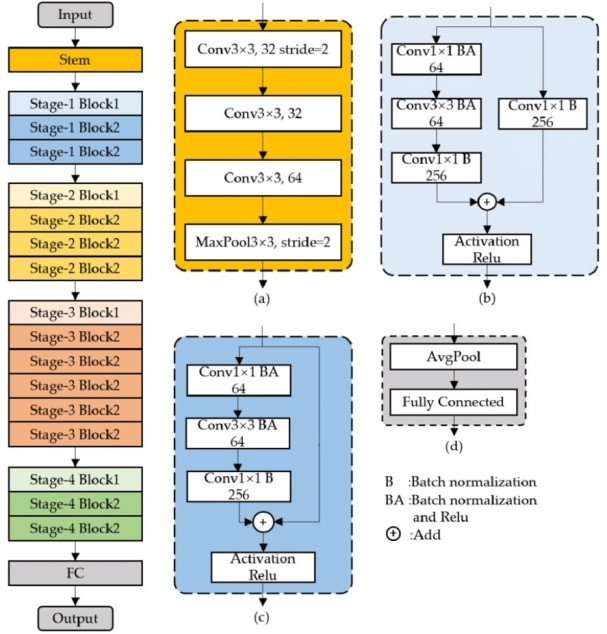

Stem definition (not necessary to run it)

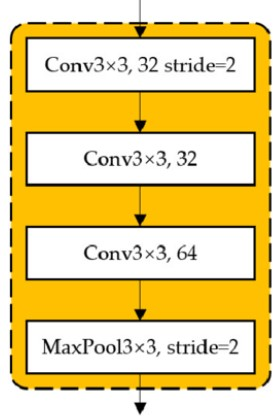

In [ ]:
        x = keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same')(inputs)
        x = keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same')(x)
        x = keras.layers.Conv2D(64, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same')(x)
        x = keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

Skip connection (not necessary to run it)

In [ ]:
#skip connection
skip = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#skip connection
...
#skip connection
x = keras.layers.Conv2D(64, (3, 3), padding='same')(x)
merge = keras.layers.add([x, skip])
#skip connection

In [ ]:
# predict returns vector of confidence and then display the max confidence as it would be the confidence of the prediction
def certainty(self, input_array: np.ndarray) -> np.ndarray:
    # Given a batch of examples return a batch of certainty levels.
    certainties = []
    for row in input_array:
        input = np.array(row).reshape((1, 32, 32, 3)).astype('float32') / 255
        prediction = self.predict(input).ravel()
        certainties.append(np.max(prediction))
    return np.array(certainties)

Loading data:

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Trining model:

In [ ]:
model = Model.make_model(num_classes=10)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
model.save('proper_model.h5')

Extra methods

In [ ]:
def accuracy(preds, labels):
    dict_acc_ev = {}
    classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

    correct = 0
    total = 0
    result = 0
    total += np.size(labels)
    correct += (preds == labels).sum().item()
    # if total != 0:
    result = 100 * correct / total
    labels = np.transpose(labels)
    labels = labels[0,:]

    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    # collect the correct predictions for each class
    for label, prediction in zip(labels, preds):
        if label == prediction:
            correct_pred[classes[label]] += 1
        total_pred[classes[label]] += 1

    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        if total_pred[classname] != 0:
            class_acc = 100 * float(correct_count) / total_pred[classname]
            dict_acc_ev[classname] = class_acc

    df_class_accuracy = pd.DataFrame.from_dict(dict_acc_ev, orient='index')
    df_class_accuracy = df_class_accuracy.T
    return result, df_class_accuracy


def create_historigram(certainties, predictions, labels):
    # fig, axis = plt.subplots(figsize=(10, 5))
    predictions_unique = np.unique(predictions)
    df_pred_correct = pd.DataFrame()
    df_pred_wrong = pd.DataFrame()
    df_pred_correct_after = pd.DataFrame()
    df_pred_wrong_after = pd.DataFrame()
    for i in range(0, certainties.size):
        if predictions[i] == labels[i]:
            temp_df = pd.DataFrame([[certainties[i]]], columns=["c " + str(labels[i])])
            df_pred_correct = pd.concat([df_pred_correct, temp_df])
            temp_df = pd.DataFrame([[certainties[i]]], columns=[str(labels[i]) + "c "])
            df_pred_correct_after = pd.concat([df_pred_correct_after, temp_df])
        else:
            temp_df = pd.DataFrame([[certainties[i]]], columns=["w " + str(predictions[i])])
            df_pred_wrong = pd.concat([df_pred_wrong, temp_df])
            temp_df = pd.DataFrame([[certainties[i]]], columns=[str(labels[i]) + "w "])
            df_pred_wrong_after = pd.concat([df_pred_wrong_after, temp_df])
    df = pd.concat([df_pred_correct, df_pred_wrong])
    df = pd.DataFrame(df.mean(axis=0), columns=['Certainty'])
    df.reset_index(inplace=True)
    df = df.rename(columns={'index': 'predictions'})
    df.sort_values('predictions').plot.bar(x="predictions", y="Certainty", rot=70)
    plt.show(block=True)

    df = pd.concat([df_pred_correct_after, df_pred_wrong_after])
    df = pd.DataFrame(df.mean(axis=0), columns=['Certainty'])
    df.reset_index(inplace=True)
    df = df.rename(columns={'index': 'predictions'})
    df.sort_values('predictions').plot.bar(x="predictions", y="Certainty", rot=70)
    plt.show(block=True)

    df_pred_correct = df_pred_correct[sorted(df_pred_correct.columns)]
    df_pred_correct.hist(sharex=True, figsize=(20, 10))
    plt.show(block=True)
    df_pred_wrong = df_pred_wrong[sorted(df_pred_wrong.columns)]
    df_pred_wrong.hist(sharex=True, figsize=(20, 10))
    plt.show(block=True)


def all_in_one(self, input_array: np.ndarray, labels):
    predictions = []
    certainties = []
    for row in input_array:
        input = np.array(row).reshape((1, 32, 32, 3)).astype('float32') / 255
        prediction = self.predict(input).ravel()
        certainties.append(np.max(prediction))
        predictions.append(np.argmax(prediction))

    predictions = np.array(predictions)
    certainties = np.array(certainties)
    accuracy_o = accuracy(predictions, labels)
    create_historigram(certainties, predictions, labels)
    return predictions, certainties, accuracy_o

Testing model:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

root_dir = "/content/gdrive/My Drive/"

model_img = keras.models.load_model(root_dir+'project_model.h5')

predictions, certainties, accuracy = all_in_one(model_img, X_test, y_test)

print(y_test)
print(predictions)
print(certainties)
print(accuracy)

Accuracy per class:

0    & 1    & 2    & 3    & 4    & 5    & 6    & 7    & 8    & 9    

86.3 & 93.0 & 67.1 & 66.9 & 77.6 & 59.5 & 88.3 & 85.8 & 83.5 & 87.5


Overall accuracy at 10 epochs: 79.55% 

Histogram correct prediction certainty per class. Certainty on the x axis

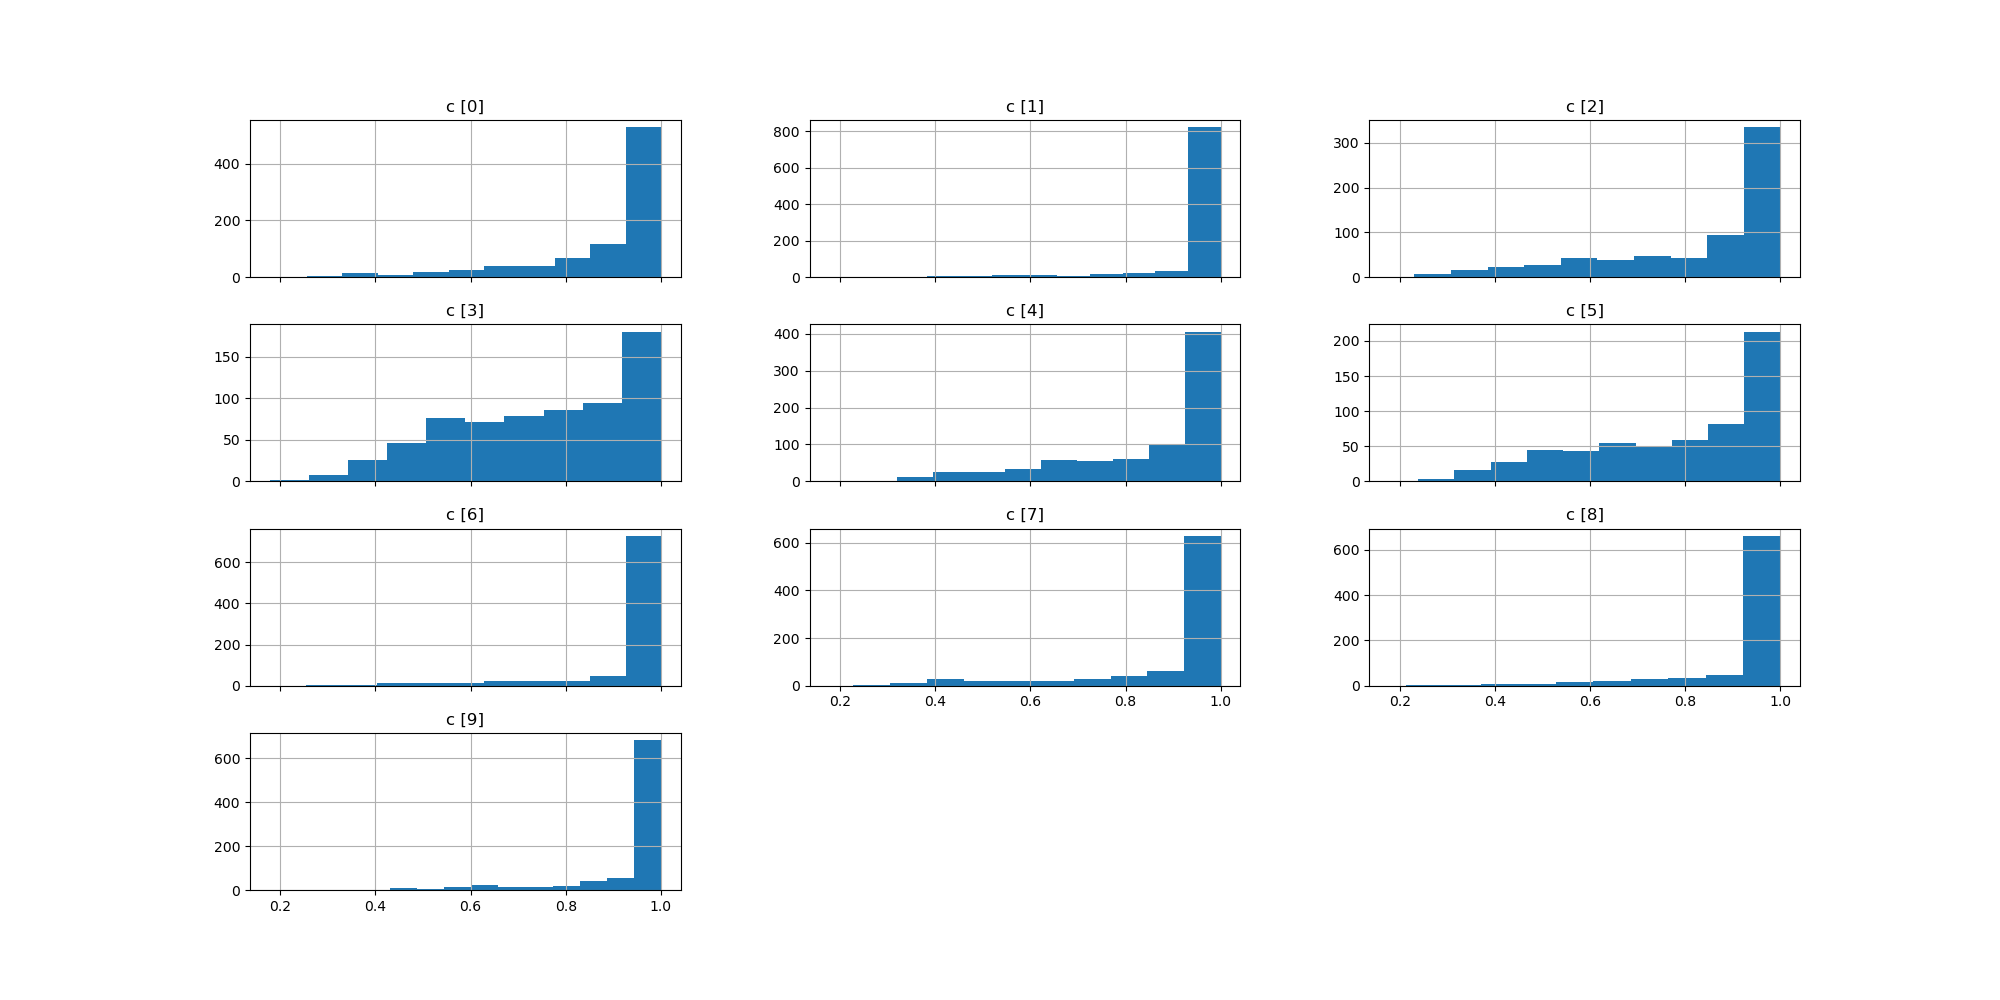

Histogram wrong prediction certainty per class

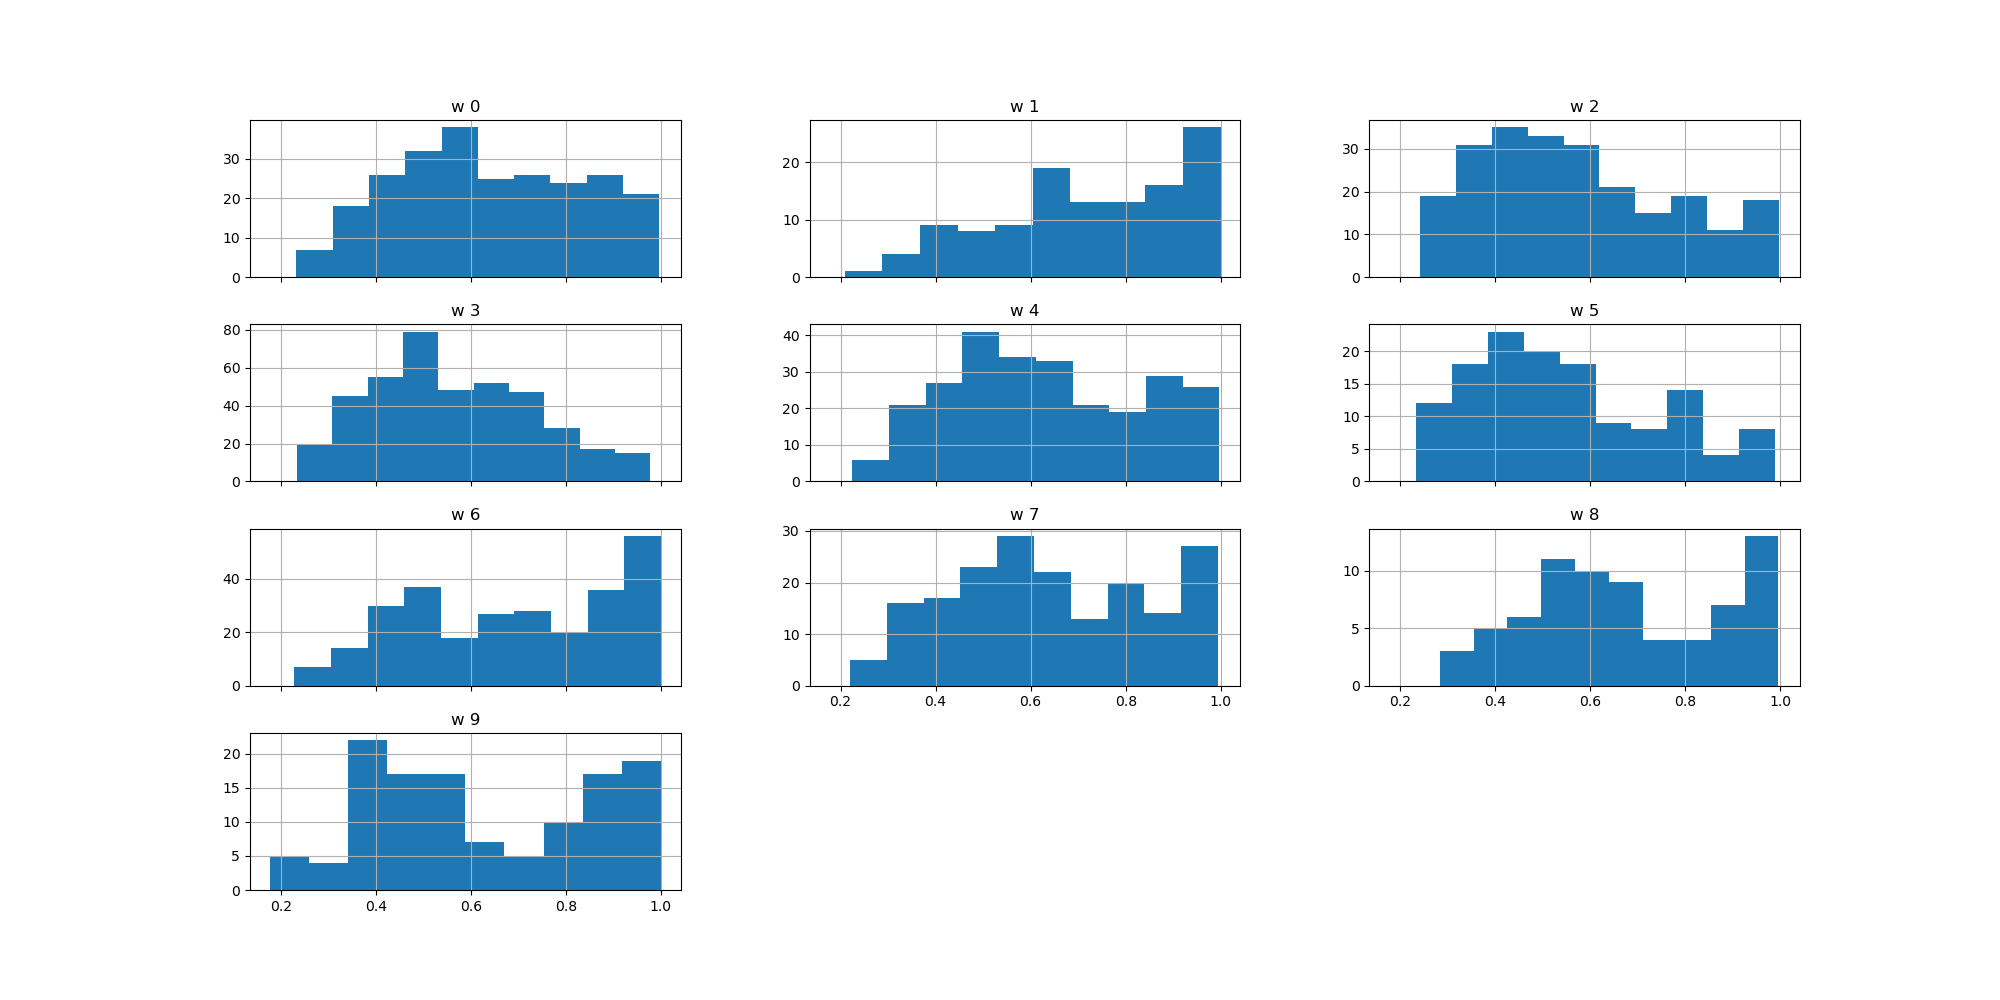

Average certainty per class - correct on the left and wrong on the right 

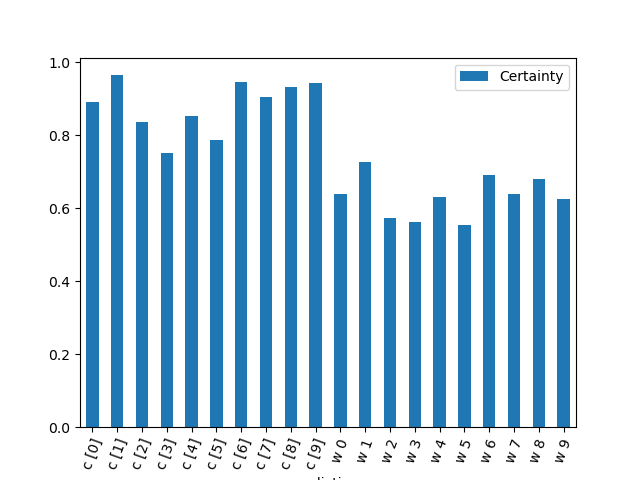

Average certainty for comparing differences between each class correct and wrong

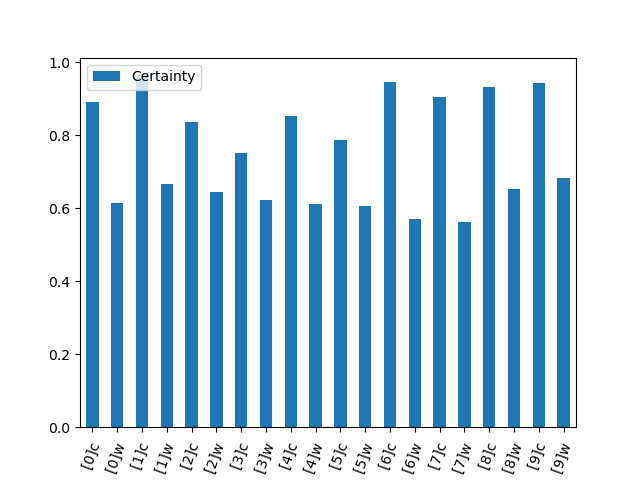